<font color="#279D9F"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Práctica 1: Estadística</h2></font>
<font color="#000000"><h3 align="center">Autor: Guillermo García López</h3></font>

## 1) Generación de Histogramas.

## Tu turno 1: Calcular los histogramas para el diámetro y volumen de esta muestra de cerezos negros, extrayendo las conclusiones de las distribuciones representadas para diferentes parámetros.

In [64]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

In [65]:
# Se carga el fichero en un dataframe
file_name = 'CerezoNegro.csv'
data = pd.read_csv(file_name, sep=',')

In [66]:
# Se aislan los datos a tratar en un array de NumPy
dataM=data.values

In [67]:
# Muy importante, que los gráficos salgan embebidos en la página.
%matplotlib inline 
# Importar la librería de visualización gráfica
import matplotlib.pyplot as plt # importando matplotlib

De manera análoga a lo realizado con la variable Altura, se realiza el histograma para las variables Diámetro 
 y Volumen. Se defina una función para plotear los datos:

In [68]:
def plot_hist(df=dataM, bins=6):
    plt.figure(figsize=(15, 6))
    # Diámetro
    plt.subplot(1,2,1)
    plt.title('Diámetro de los cerezos negros (bins = {0})'.format(bins), fontsize=16)
    plt.xlabel('Diámetro', fontsize=14), plt.ylabel('Probabilidad', fontsize=14)
    plt.hist(df[:,1], bins, density=True)
        
    # Volumen
    plt.subplot(1,2,2)
    plt.title('%s' % 'Volumen de los cerezos negros (bins = {0})'.format(bins), fontsize=16)
    plt.xlabel('Volumen', fontsize=14), plt.ylabel('Probabilidad', fontsize=14)
    plt.hist(df[:,3], bins, density=True, color='red')
    
    plt.show()

Y se printan los resultados modificando el número de bins para 6, 8 y 10:

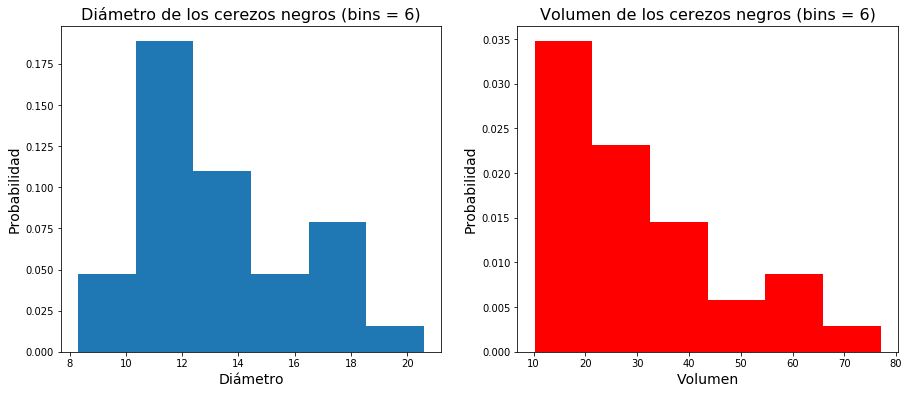

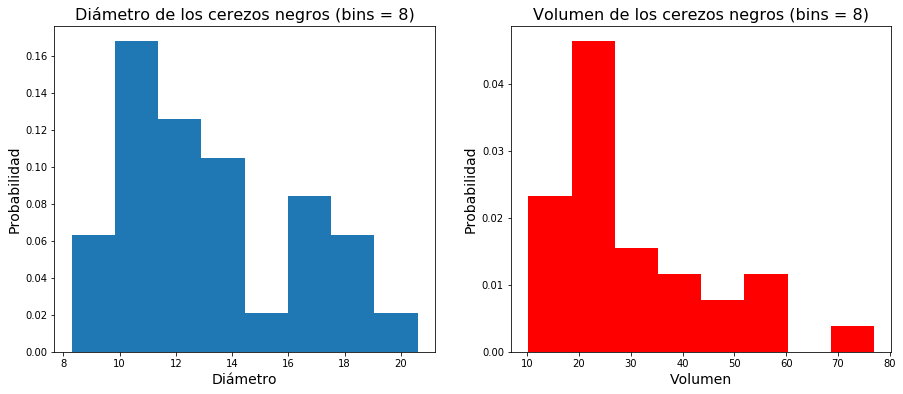

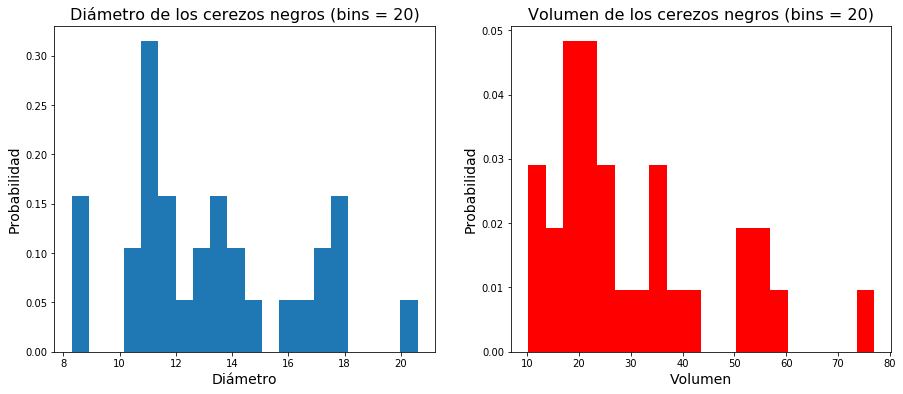

In [69]:
for i in [6,8,20]:
    plot_hist(bins=i)

Como se aprecia para la variable diámetro las representaciones con 6 y 8 bins ya muestran una mayor frecuencia entre 10 y 14. Para la variable Volumen, la mayor parte de la distribución se sitúa alrededor de 20, con algunos valores entre 70 y 80, que habría que ver si pueden ser datos atípicos.

## 3) Cálculos de descriptivos de variables.

## Tu turno 2: Calcular la media, moda, varianza y coeficiente de variación de las tres distribuciones de propiedades para los cerezos negros.

Definimos los arrays de numpy en variables:

In [70]:
girth = dataM[:,1]
height = dataM[:,2]
volume = dataM[:,3]

In [71]:
def cerezos_stats(datos, variable):
    print('Media de {0}: {1:.4f}'.format(variable, (np.mean(datos))))
    print('Moda de {0}: {1:.4f}'.format(variable, stats.mode(datos)[0][0]))
    print('Varianza de {0}: {1:.4f}'.format(variable, np.var(datos)))
    print('Coef. de variación de {0}: {1:.4f}'.format(variable, stats.variation(datos)))

Para la variable Diámetro:

In [72]:
cerezos_stats(girth, 'Diámetro')

Media de Diámetro: 13.2484
Moda de Diámetro: 11.0000
Varianza de Diámetro: 9.5302
Coef. de variación de Diámetro: 0.2330


Para la variable Altura:

In [73]:
cerezos_stats(height, 'Altura')

Media de Altura: 76.0000
Moda de Altura: 80.0000
Varianza de Altura: 39.2903
Coef. de variación de Altura: 0.0825


Para la variable Volumen:

In [74]:
cerezos_stats(volume, 'Volumen')

Media de Volumen: 30.1710
Moda de Volumen: 10.3000
Varianza de Volumen: 261.4866
Coef. de variación de Volumen: 0.5360


Sobre estos resultados, es de destacar la gran variabilidad de la variable "Volumen": una varianza muy grande, dejando una desviación típica de ~ 16.67 cm para una media de 30.17 cm.



# 4) Patrones Iris


## Tu turno 3: Utilizar el fichero iris de patrones (iris.data.mio.cvs) para hacer un análisis exploratorio básico de las diferentes características de cada patrón, extrayendo las conclusiones apropiadas de los mismos.

Para realizar un análisis exploratorio básico, se seguirá una operativa similar a la anteriormenter hecha para el fichero de cerezos negros. Primero cargamos los datos del fichero en un dataframe:

In [75]:
dfIris = pd.read_csv('iris.data.mio.csv', sep=',')
# Revisamos las dimensiones:
dfIris.shape

(150, 5)

In [76]:
# Revisamos el .head() del dataframe para hacernos una idea del aspecto:
dfIris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Debiera realizarse un análisis sobre parámetros estadísticos básicos sobre el dataframe completo de flores. Gran parte de estas estadísticas vienen implementadas por el método .describe() de Pandas, si bien faltan algunas: por ello se va a generar un dataframe con iguales columnas (salvo la última 'class') para cada datos estadístico de varianza, moda, coeficiente de variación y coeficiente de asimetría, y finalmente se concatenarán, de manera que en un único dataframe se disponga de toda la información estadística:

In [77]:
def total_stats(datos):
#   Varianza
    dfVar = pd.DataFrame(np.var(datos).values.reshape(1,4), columns=np.var(datos).index, index=['var']) 
#   Moda
    dfModa = pd.DataFrame(stats.mode(datos)[0], columns=datos.columns, index=['mode'])
#   Coeficiente de variación
    dfCoVar = pd.DataFrame(stats.variation(datos).reshape(1,4), columns=datos.columns, index=['coVar'])
#   Coeficiente de asimetría
    dfCoAs = pd.DataFrame(stats.skew(datos).reshape(1,4), columns=datos.columns, index=['coAs'])
#   Coeficiente de curtosis
    dfCoKur = pd.DataFrame(stats.kurtosis(datos, fisher=True).reshape(1,4), columns=datos.columns, index=['CoKur'])
    return (pd.concat([datos.describe(), dfVar, dfModa, dfCoVar, dfCoAs,dfCoKur]))


Y lo calculamos sobre iris (excluyendo el atributo 'class'):

In [78]:
total_stats(dfIris.drop(['class'], axis=1))

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
var,0.681122,0.186751,3.092425,0.578532
mode,5.000000,3.000000,1.500000,0.200000


Con respecto a estos datos, observamos que para las variables sepal_length y sepal_width tenemos una std realtivamente bajas
respecto de su media, si bien para las otras dos varfiables son muy altas. Además, el coeficiente de curtosis sale bastante grande para estas variables (tener en cuenta que ya se ha corregido al de la normal). Por tanto, parece conveniente dividir el dataframe en 3 "subdataframes", con 1 por cada clase:

In [79]:
iris0 = dfIris[dfIris['class'] == 0].drop(['class'], axis=1)
iris1 = dfIris[dfIris['class'] == 1].drop(['class'], axis=1)
iris2 = dfIris[dfIris['class'] == 2].drop(['class'], axis=1)

Y realizar sobre estos el análisis de aquí en adelante.

<h6> Para la clase 0:</h6>

Histogramas de cada atributo.

Definimos una función que reutilizaremos para los histogramas de cada clase de flores:

In [80]:
def iris_plot(data, bins):

    plt.figure(figsize=(15, 12))
    
    plt.subplot(2,2,1)
    plt.title('Variable Sepal Length', fontsize=16)
    plt.xlabel('Longitud', fontsize=12), plt.ylabel('count', fontsize=14)
    plt.hist(data.sepal_length, bins, density=True)
    # plt.hist(dfIris.sepal_length, 20, density=True)
    
    plt.subplot(2,2,2)
    plt.title('Variable Petal Length', fontsize=16)
    plt.xlabel('Longitud', fontsize=12), plt.ylabel('count', fontsize=14)
    plt.hist(data.petal_length, bins, density=True, color='cyan')
    # plt.hist(dfIris.petal_length, 20, density=True)
    
    plt.subplot(2,2,3)
    plt.title('Variable Sepal Width', fontsize=16)
    plt.xlabel('Anchura', fontsize=12), plt.ylabel('count', fontsize=14)
    plt.hist(data.sepal_width, bins, density=True, color='gray')
    # plt.hist(dfIris.sepal_width, 20, density=True, color='gray')

    plt.subplot(2,2,4)
    plt.title('Variable Petal Width', fontsize=16)
    plt.xlabel('Anchura', fontsize=12), plt.ylabel('count', fontsize=14)
    plt.hist(data.petal_width, bins, density=True, color='orange')
    # plt.hist(dfIris.petal_width, 20, density=True, color='orange')
    
    plt.show()

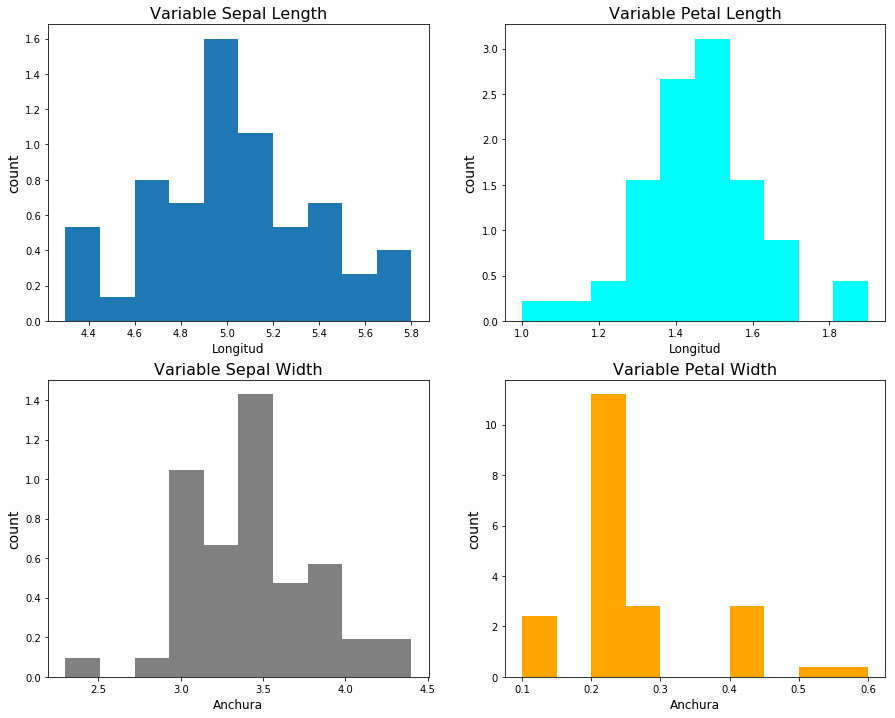

In [81]:
iris_plot(iris0, 10)

De las distribuciones de cada uno de los atributos para las flores de clase 0 apreciamos que:
    - en el atributo Sepal Length, vemos que parece haber una distribución cuasinormal, con una mayoría de datos
      centrada en el intervalo 4.9-5.2 cm.  
    - en el atributo Petal Length el análisis es similar, si bien esta vez el rango que concentra más datos es el
      de 1.4-1.5 cm y parece haber más datos a la izquierda de este intervalo, pareciendo que la distribución es, a
      simple vista, menos simétrica.
    - Para Sepal Width, el dato más frecuente es claramente el de anchura de ~3.4 cm.
    - Para Petal Width, hay una distribución mucho más dispersa, con anchuras muy distribuidas y nada centradas en 
      rango: pudiera decirse sin embargo que hay más datos en el intervalo 0.20-0.25 cm de anchura.
      

In [82]:
total_stats(iris0)

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.006000,3.418000,1.464000,0.244000
std,0.352490,0.381024,0.173511,0.107210
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.125000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.675000,1.575000,0.300000
max,5.800000,4.400000,1.900000,0.600000
var,0.121764,0.142276,0.029504,0.011264
mode,5.000000,3.400000,1.500000,0.200000


Del dataframe anterior se extraen algunas conclusiones: 

    -la desviación estándar es pequeña con respecto a la media, salvo para la variable petal_width.
    -los percentiles, dado que tenemos una distribución donde el mínimo y el máximo de cada atributo son cercanos 
    (es decir, no hay muchísimos datos), no aportan información realmente significativa.
    -la moda es bastante cercana a la media, lo que unido al bajo coeficiente de variación indica distribuciones 
    bastante "centradas".
    -la variable petal_width muestra un coeficiente de asimetría mucho mayor que el resto, lo que casa con las 
    conclusiones expuestas anteriormente en base a los histogramas.

<h6> Para la clase 1:</h6>

Histogramas de cada atributo.

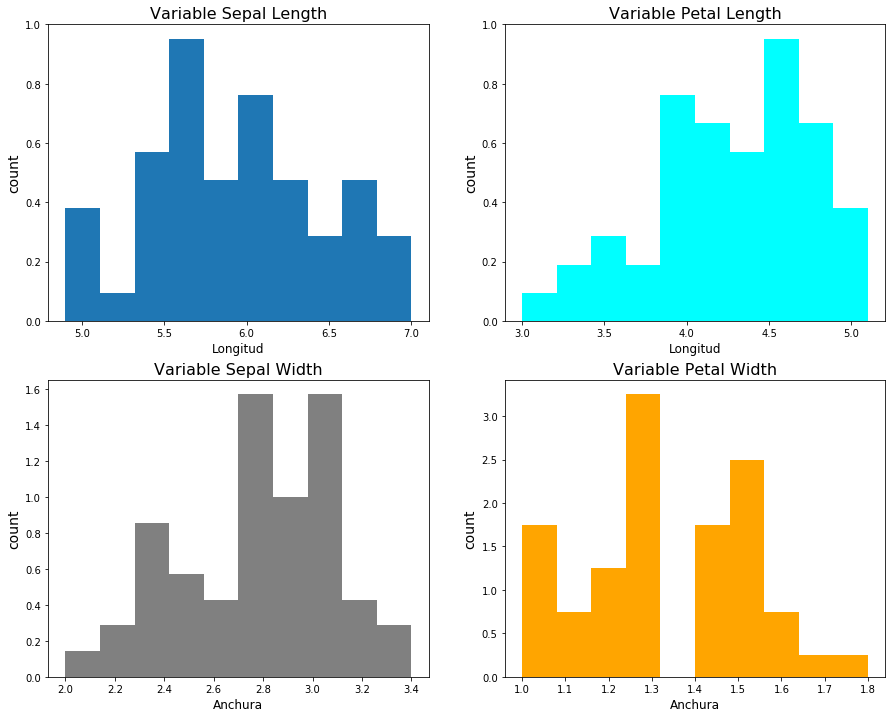

In [83]:
iris_plot(iris1, 10)

Para la clase 1 de flores pueden extraerse las siguientes conclusiones:

    -la distribución de la variable Sepal_Length parece menos apuntada que para la clase 1, en el sentido de que parece
    haber más datos hacia las colas de la distribución.
    -de la variable Petal_Length puede decirse lo mismo, si bien parece más apuntada hacia la derecha de la distribución.
    -la variable Sepal_Width ya no sigue una distribución tan semejante a la normal. Tiene muchos datos concentrados en 
    el intervalo de ~2.7 - 3.1 cm de anchura.
    -la variable Petal_Width parece presentar dos tipos de "comportamiento": una distribución entre 1.0-1.3 cm, y otra de 
    1.4-1.8 cms. Podrá verse a continuación qué sucede con esta variable con el cálculo de cantidades estadísticas 
    básicas.

Se repite el procedimiento anterior haciendo uso de la función total_stats:

In [84]:
total_stats(iris1)

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000
var,0.261104,0.096500,0.216400,0.038324
mode,5.500000,3.000000,4.500000,1.300000


    -Las medias de las variables de pétalos son mucho mayores que en la clase anterior, lo que indica que en este sentido 
    las flores de clase 1 son mayores que los de clase 0 (si bien la media puede estare muy influenciada por valores 
    extremos atípicos).
    -Se tienen ahora en general unos percentiles más desplazados hacia la derecha, lo que corrobora lo visto en los 
    histogramas: hay más masa de los datos hacia la derecha de la población. 
    -Hay mayor diferencia entre la moda y la media para cada una de las variables.
    -Los coeficientes de variación son en general bajos (algo más alto para la variable petal_width, siguiendo la 
    tendencia de esta variable de presentar un comportamiento más particular).
    -Los coeficientes de asimetría son bajos pero negativos para las tres últimas variables, consistente con lo observado
     en los histogramas: la "cola" de la distribución queda a la izquierda y los datos se agrupan mayoritariamente a la 
     derecha.

<h6>Para la clase 2:</h6>

Histogramas de cada atributo.

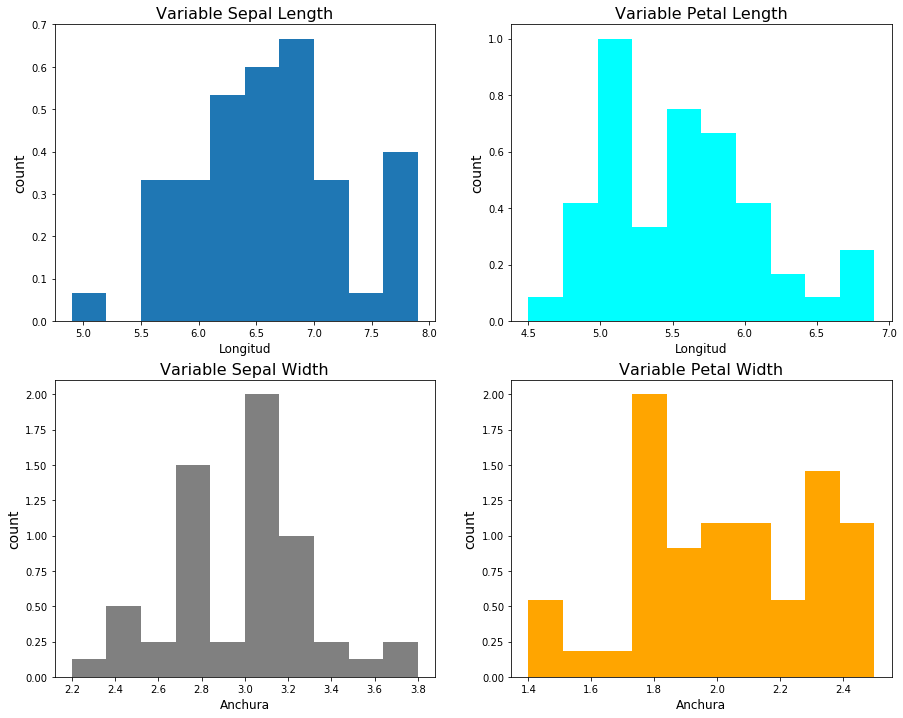

In [85]:
iris_plot(iris2, 10)

Para estos histogramas:

    -la variable Sepal_Length presenta una distribución cuasinormal con muchos datos en la zona central de la 
    distribución, muy poco en la "cola" izquierda y una media en torno a 6.5 cm.
    -la variable Petal_Length parece más desplazada a la izquierda, con una mayor distribución en ~5.1 cm.
    -la variable Sepal_Width parece bastante distribuida.
    -la variable Petal_Width no presenta a simple vista ningún patrón.

Variables estadísticas básicas: media, mediana, desviación típica, varianza, moda, coeficiente de variación y coeficiente de asimetría.

In [86]:
total_stats(iris2)

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,6.588000,2.974000,5.552000,2.026000
std,0.635880,0.322497,0.551895,0.274650
min,4.900000,2.200000,4.500000,1.400000
25%,6.225000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.550000,2.000000
75%,6.900000,3.175000,5.875000,2.300000
max,7.900000,3.800000,6.900000,2.500000
var,0.396256,0.101924,0.298496,0.073924
mode,6.300000,3.000000,5.100000,1.800000


    -En este caso de nuevo no hay gran desviación típica respecto de la media para ningún atributo.
    -La variable Petal_Length presenta un percentil 75% próximo a su media, lo que indica que la mayoría de sus datos
    queda próximo a ella.
    -El coeficiente de asimetría es positivo siempre salvo para la variable Petal_Width, consistente con la "forma" de la 
    distribución que se aprecia en la distribución: "cola" a la izquierda y datos a la derecha (cualitativamente 
    hablando).


# 5) Boxplots


## Tu turno 4: Utilizar el fichero iris de patrones (iris.data.mio.cvs) para hacer un análisis exploratorio básico mediante boxplots. Cambia los símbolos de los "outliers".

Ya tenemos el dataframe con iris.data.mio.cvs cargado, así que lo aprovechamos. Se crea una función para que plotee, para cada dataframe, el boxplot para cada una de las 4 variables y variando el valor de la distancia a los "bigotes":

In [87]:
def iris_boxplots(data, variable, IQR_range=[.5, 1., 1.5]):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1,3,1)
    plt.title('IQR = {0}'.format(IQR_range[0]), fontsize=18)
    plt.ylabel('{0}'.format(variable), fontsize=15)
    plt.boxplot(data[variable], whis=IQR_range[0], flierprops={'marker': 'D'})
        
    plt.subplot(1,3,2)
    plt.title('IQR = {0}'.format(IQR_range[1]), fontsize=20)
    plt.boxplot(data[variable], whis=IQR_range[1], flierprops={'marker': 'o'})
    
    plt.subplot(1,3,3)
    plt.title('IQR = {0}'.format(IQR_range[2]), fontsize=20)
    plt.boxplot(data[variable], whis=IQR_range[2], flierprops={'marker': 's'})
    
    plt.show()

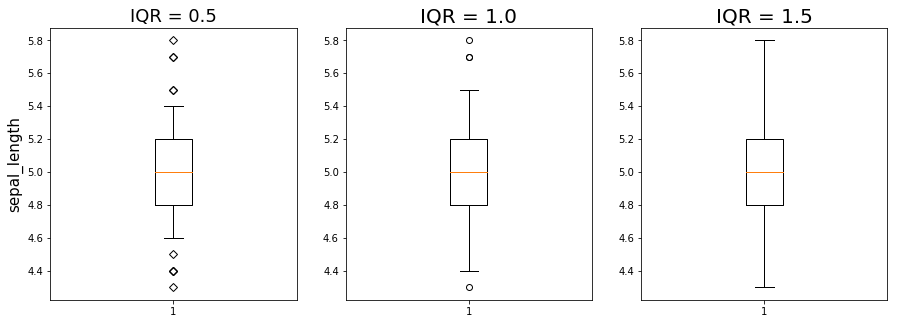

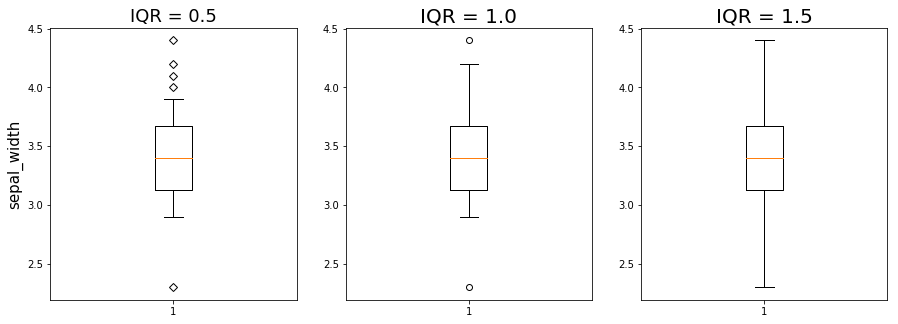

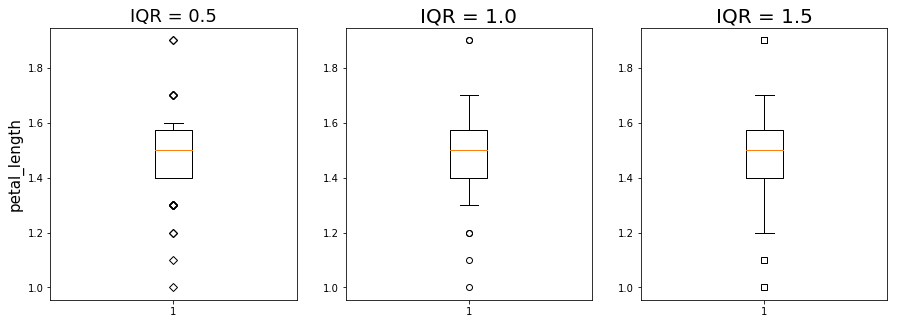

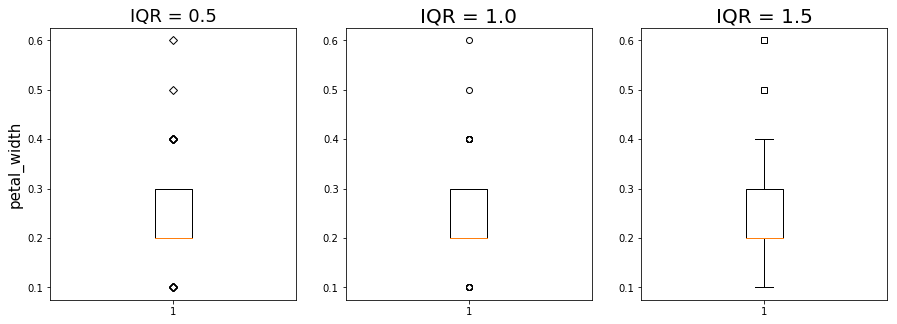

In [88]:
for var in iris0.columns:
    iris_boxplots(iris0, variable=var)

Como se aprecia para las flores de clase 0, hay bastantes outliers: en el caso de la variable petal_width los "bigotes" no se aprecian dado que quedan dentro del rango intercuartílico. De nuevo se refleja que esta variable presenta un comportamiento más atípico que el resto de variables del dataframe.

Repetimos el análisis para las flores de la clase 1:

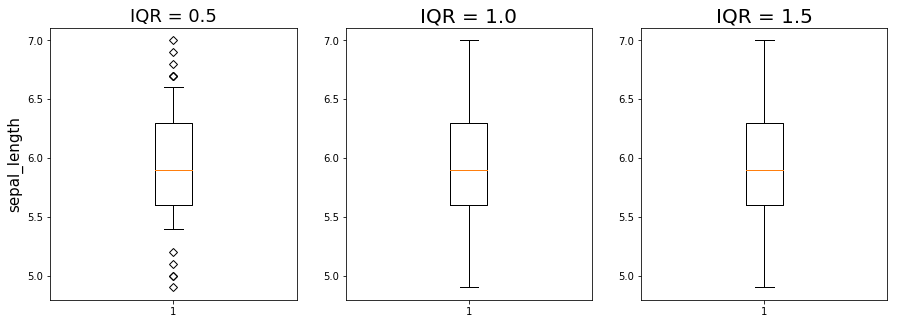

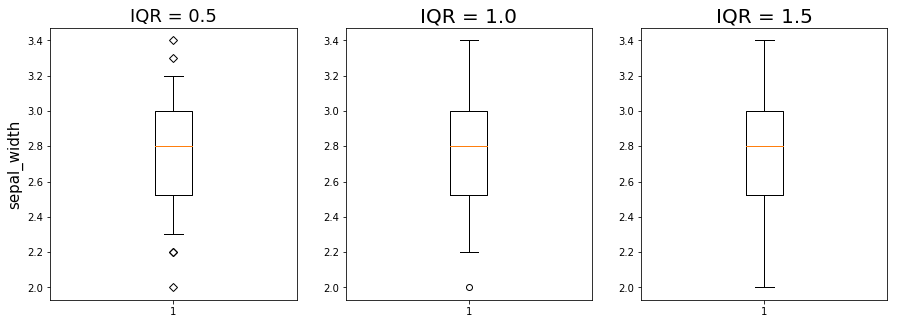

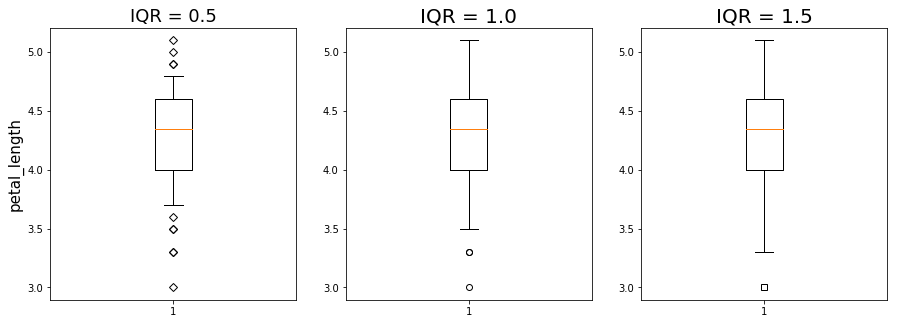

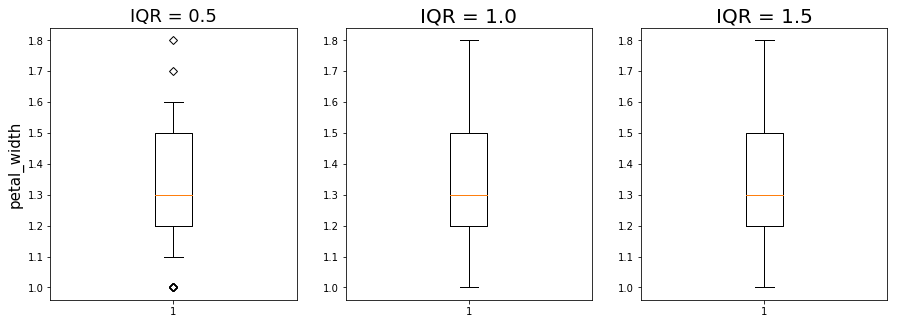

In [89]:
for var in iris1.columns:
    iris_boxplots(iris1, variable=var)

En este caso se aprecia una distribución más regular, con algunos outliers para whis = 0.5 que quedan dentro de los valores Li, Ls si se aumenta el valor de whis.

Finalmente para las flores de la clase 2:

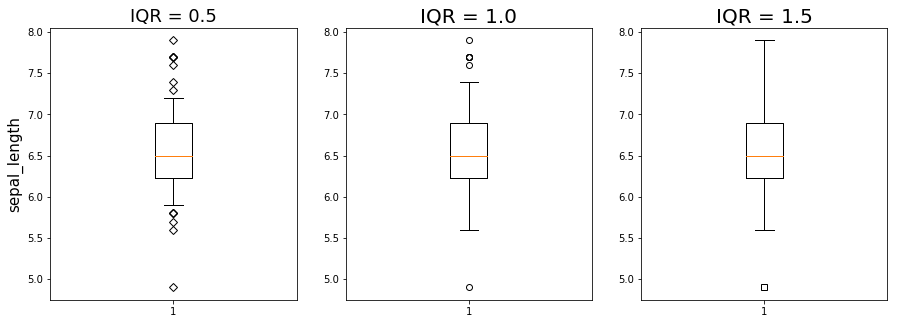

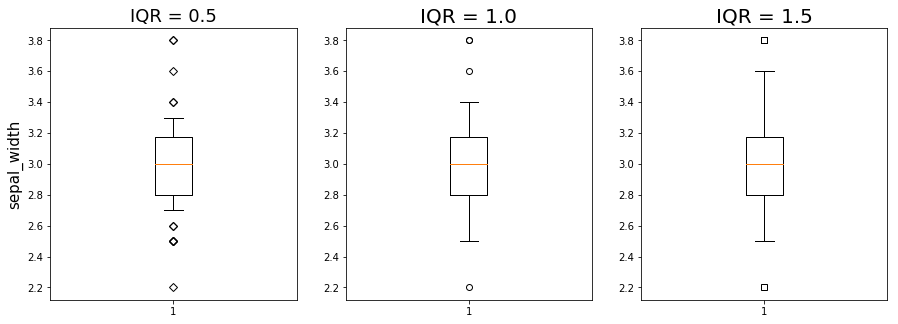

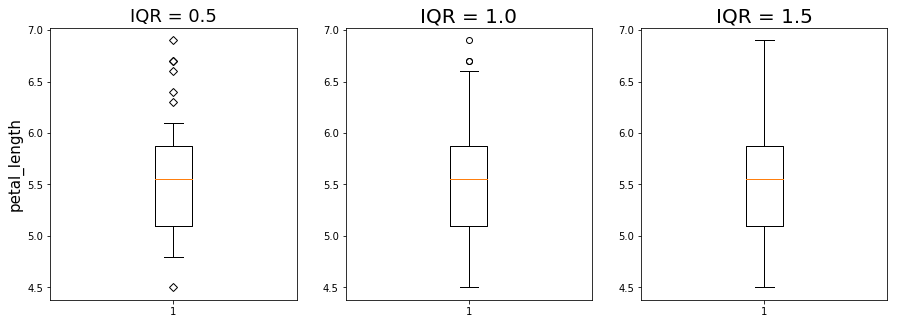

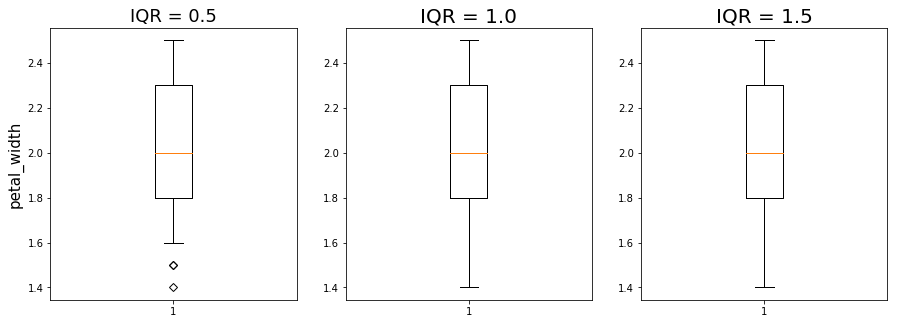

In [90]:
for var in iris2.columns:
    iris_boxplots(iris2, variable=var)

Las conclusiones son similares a las obtenidas para las flores de la clase 1.


# 6) Diagramas de dispersión en una matriz


## Tu turno 5: Utilizar el fichero iris de patrones (iris.data.mio.cvs) para hacer un análisis exploratorio de distribuciones de frecuencia multivariantes (scatter_matrix).

Se realiza un scatter_matrix sobre cada uno de los subsets de clase, con la función de la diagonal siendo 'hist':

<h6>Clase 0:</h6>

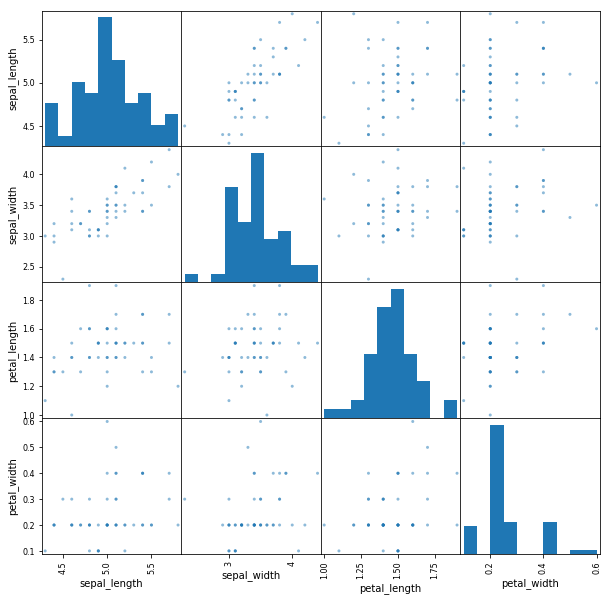

In [91]:
from pandas.plotting import scatter_matrix
scm0 = scatter_matrix(iris0, alpha=0.5, figsize=(10, 10), diagonal='hist')

<h6>Clase 1:</h6>

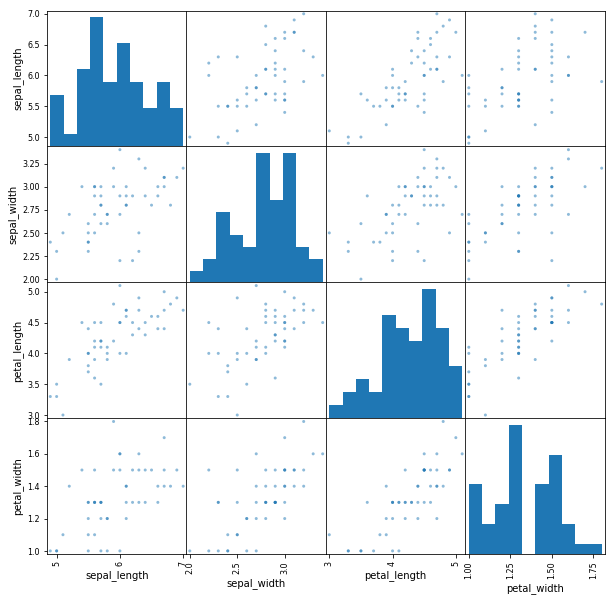

In [92]:
scm1 = scatter_matrix(iris1, alpha=0.5, figsize=(10, 10), diagonal='hist')

<h6>Clase 2:</h6>

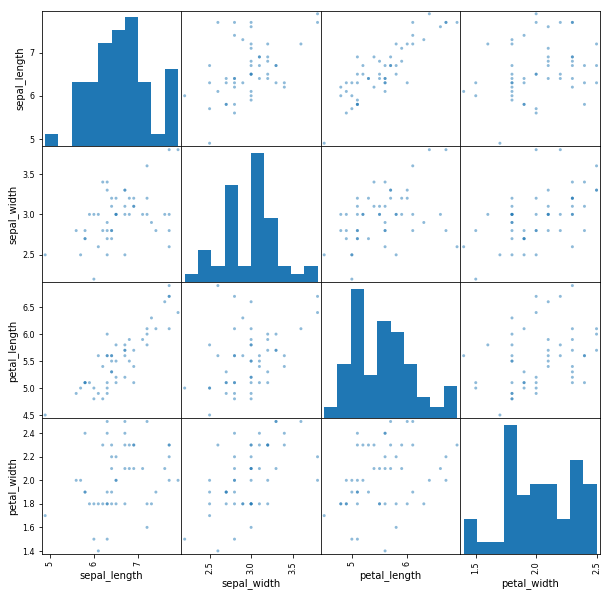

In [93]:
scm2 = scatter_matrix(iris2, alpha=0.5, figsize=(10, 10), diagonal='hist')

La interpretación de estos scatter_matrix es como sigue:

    -para las clases 1 y 2 de flores, la variable sepal_length presenta un histograma ya comentado anteriormente, y una 
    correlación con la variable petal_lendth que pudiera tener cierta linealidad.
    -La variable petal_width representa una distribución más atípica en todas las clases.
    -En general y con solo 50 puntos por variable, es difícil establecer con seguridad el carácter de las correlaciones 
    entre variables.


# 7) Covarianzas versus correlaciones.


## Tu turno 6: Interpretar los resultados anteriores sobre correlaciones y covarianzas en el fichero CerezoNegro.csv. Utilizar el fichero iris de patrones (iris.data.mio.cvs) para calcular las correlaciones y covarianzas e interpretar los resultados de las mismas.

Sobre los resultados para el fichero de cerezos, hay que comentar que las variables que presentan mayor correlación lineal son las variables 'girth' y 'volume'; las otras dos variables presentan ligeramente menos correlación lineal.

Representamos, de nuevo para cada clase de flores, las matrices de correlaciones y covarianzas:

In [94]:
def cov_corr(datos, clase):
    print('================================== CLASE {0} ==============================='.format(clase))
    print('Matriz de covarianzas:')
    print(datos.columns[0], datos.columns[1], datos.columns[2], datos.columns[3])
    print(np.cov(datos.T))
    print('\n')
    print('Matriz de correlaciones:')
    print(datos.columns[0], datos.columns[1], datos.columns[2], datos.columns[3])
    print(np.corrcoef(datos.T))
    
    plt.figure(figsize=(15, 8))
    
    plt.subplot(1, 2, 1)
    plt.title('Covarianzas para la clase {0}'.format(clase), fontsize=16)
    mpCov = plt.colorbar(plt.imshow(np.cov(datos.T)))
    
    plt.subplot(1, 2, 2)
    plt.title('Correlaciones para la clase {0}'.format(clase), fontsize=16)
    mpCorr = plt.colorbar(plt.imshow(np.corrcoef(datos.T)))

<h6>Para la Clase 0:</h6>

================================== CLASE 0 ===============================
Matriz de covarianzas:
sepal_length sepal_width petal_length petal_width
[[0.12424898 0.10029796 0.01613878 0.01054694]
 [0.10029796 0.14517959 0.01168163 0.01143673]
 [0.01613878 0.01168163 0.03010612 0.00569796]
 [0.01054694 0.01143673 0.00569796 0.01149388]]


Matriz de correlaciones:
sepal_length sepal_width petal_length petal_width
[[1.         0.74678037 0.26387409 0.27909157]
 [0.74678037 1.         0.17669463 0.27997289]
 [0.26387409 0.17669463 1.         0.30630821]
 [0.27909157 0.27997289 0.30630821 1.        ]]


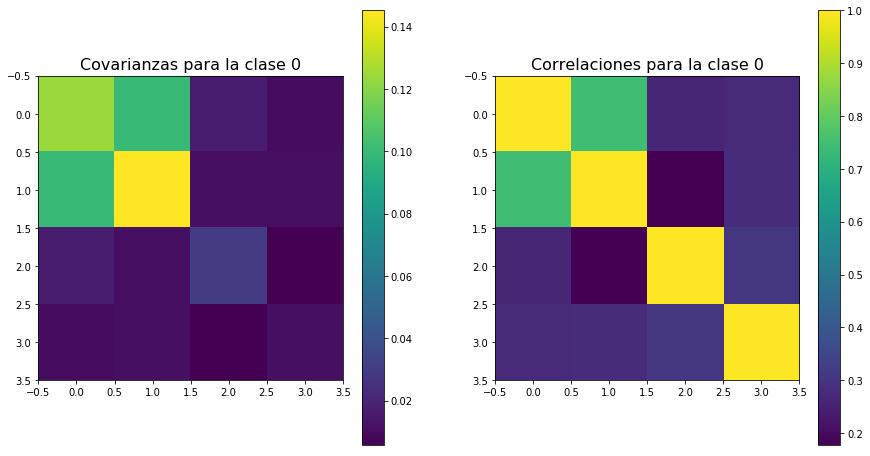

In [95]:
cov_corr(iris0, '0')

A la vista de los resultados, puede apreciarse que a priori no hay una correlación claramente lineal entre las variables: las dos que más correlación tienen son 'sepal_length' y 'sepal_width'.

<h6>Para la Clase 1:</h6>

================================== CLASE 1 ===============================
Matriz de covarianzas:
sepal_length sepal_width petal_length petal_width
[[0.26643265 0.08518367 0.18289796 0.05577959]
 [0.08518367 0.09846939 0.08265306 0.04120408]
 [0.18289796 0.08265306 0.22081633 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]


Matriz de correlaciones:
sepal_length sepal_width petal_length petal_width
[[1.         0.52591072 0.75404896 0.54646107]
 [0.52591072 1.         0.56052209 0.66399872]
 [0.75404896 0.56052209 1.         0.78666809]
 [0.54646107 0.66399872 0.78666809 1.        ]]


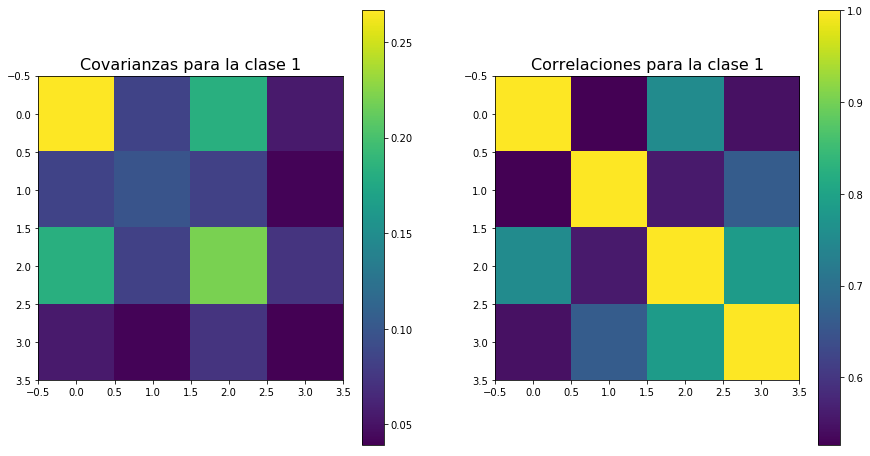

In [96]:
cov_corr(iris1, '1')

Esta clase presenta unos resultados algo diferentes: hay una correlación alrededor de algo más del 0.75 entre las variables 'sepal_length' y 'petal_length', y 'petal_length' y 'petal_width' respectivamente.

<h6>Para la Clase 2:</h6>

================================== CLASE 2 ===============================
Matriz de covarianzas:
sepal_length sepal_width petal_length petal_width
[[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]


Matriz de correlaciones:
sepal_length sepal_width petal_length petal_width
[[1.         0.45722782 0.86422473 0.28110771]
 [0.45722782 1.         0.40104458 0.53772803]
 [0.86422473 0.40104458 1.         0.32210822]
 [0.28110771 0.53772803 0.32210822 1.        ]]


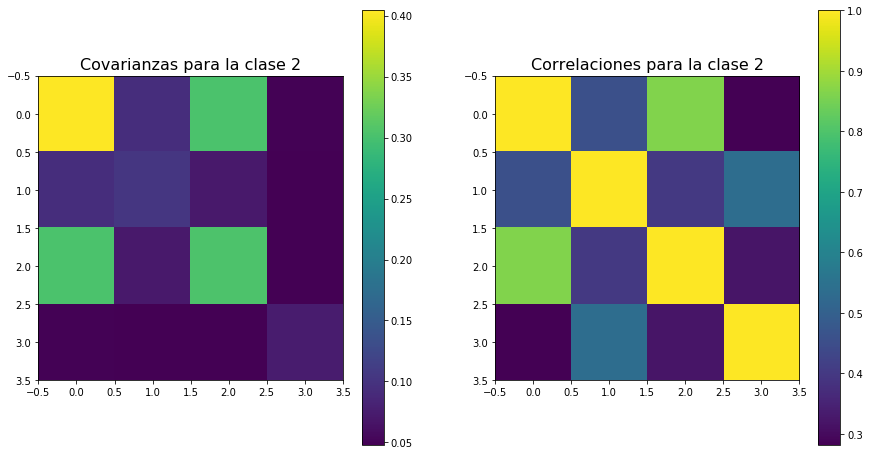

In [97]:
cov_corr(iris2, '2')

Sobre esta clase de flores, comentar que hay una correlación bastante alta entre las variables 'sepal_length' y 'petal_length', si bien el resto de variables no presentan unos coefs. de correlación destacables.

# 7) El cuarteto de Anscombe y la regresión lineal.

## Tu turno 7: Utilizar un diagrama de dispersión de matriz para este cuarteto de datos y calcular la media y dispersión para cada conjunto. Hacer un modelo de regresión lineal para las relaciones entre las variables de CerezoNegro.csv. Explicar los resultados.

In [98]:
ansco = pd.read_csv('CuartetoAnscombe.csv', sep=',')

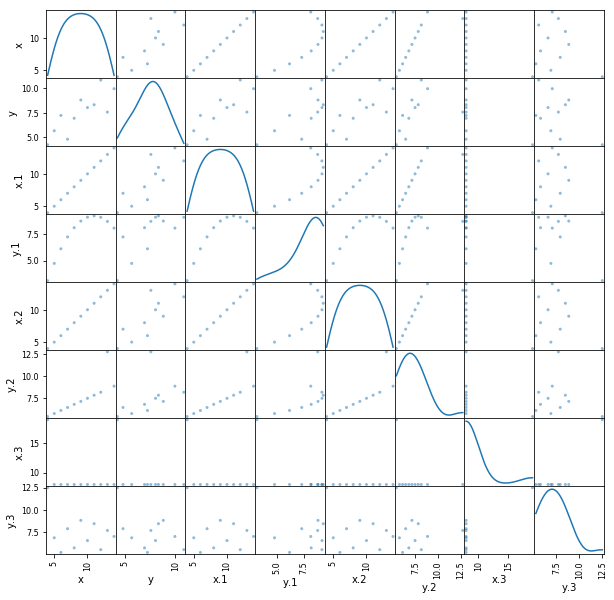

In [99]:
# Representamos una matriz de dispersión para el cuarteto de Anscombe:
scm_ansco = scatter_matrix(ansco, alpha=0.5, figsize=(10, 10), diagonal='kde')

Calculamos la media y la desviación típica para cada columna del dataset Anscombe, representados en un mismo dataframe para mejor visualización:

In [100]:
ansc_means = pd.DataFrame(np.mean(ansco).values.reshape(1,8), columns=np.mean(ansco).index,
                          index=['mean']) 
ansc_std = pd.DataFrame(np.std(ansco).values.reshape(1,8), columns=np.std(ansco).index,
                        index=['std']) 

In [101]:
pd.concat([ansc_means, ansc_std])

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.162278,1.937024,3.162278,1.937109,3.162278,1.935933,3.162278,1.936081


De los resultados anteriores observamos que algunas variables presentan una std alta con respecto a su valor medio, si bien en el caso del cuarteto de Anscombe lo relevante es el estudio de las variables conjuntas en pares (x,y) y no tanto el estudio de cada variable aislada.

Para el fichero de cerezos, realizamos una regresión lineal entre las 3 variables (por pares) haciendo uso de numpy.polyfit:

In [102]:
cerezos = pd.read_csv('CerezoNegro.csv', sep=',')
cerezos.values[:,1]
cerezos['Girth'].values

array([ 8.3,  8.6,  8.8, 10.5, 10.7, 10.8, 11. , 11. , 11.1, 11.2, 11.3,
       11.4, 11.4, 11.7, 12. , 12.9, 12.9, 13.3, 13.7, 13.8, 14. , 14.2,
       14.5, 16. , 16.3, 17.3, 17.5, 17.9, 18. , 18. , 20.6])

In [103]:
def reg_lin(var1, var2, datos=cerezos):
    X = datos[var1].values
    Y = datos[var2].values
    
    # Calculamos los coeficientes del ajuste (a X + b)
    b, a = np.polyfit(X, Y, 1)
    # Calculamos el coeficiente de correlación
    r = np.corrcoef(X, Y)
    
    print('Recta de ajuste lineal: Y = {1:2.3f} + {0:2.3f} X'.format(b,a))
    print('Coef. de correlación:   r = {0:2.4f}'.format(r[0,1]))
    
    # Representamos gráficamente las variables y el ajuste lineal:
    plt.plot(X, Y, 'o')
    plt.xlim(np.min(X) -2, np.max(X) +2)
    plt.ylim(np.min(Y) -5, np.max(Y) +5)
    plt.xlabel('{0}'.format(var1), fontsize=14)
    plt.ylabel('{0}'.format(var2), fontsize=14)
    plt.plot(X, a + b * X)

<h6>Variable 'Girth' con 'Height':</h6>

Recta de ajuste lineal: Y = 62.031 + 1.054 X
Coef. de correlación:   r = 0.5193


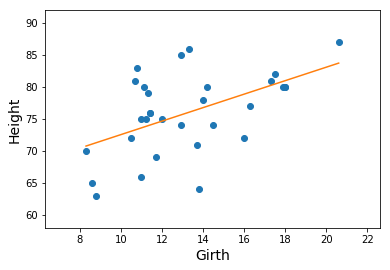

In [104]:
reg_lin('Girth', 'Height')

Vemos que el valor del coeficiente de correlación es bastante bajo, lo que indica que en este caso no hay una correlación lineal clara.

<h6>Variable 'Girth' con 'Volume':</h6>

Recta de ajuste lineal: Y = -36.943 + 5.066 X
Coef. de correlación:   r = 0.9671


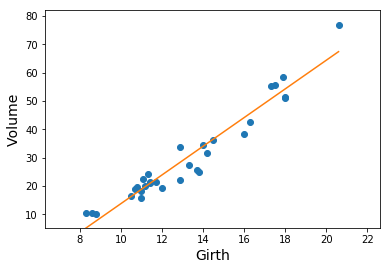

In [105]:
reg_lin('Girth', 'Volume')

En este caso vemos una altísima correlación lineal, pero tiene sentido: estamos representando el volumen del cerezo frente al diámetro, que sabemos están relacionados de esta manera.

<h6>Variable 'Height' con 'Volume':</h6>

Recta de ajuste lineal: Y = -87.124 + 1.543 X
Coef. de correlación:   r = 0.5982


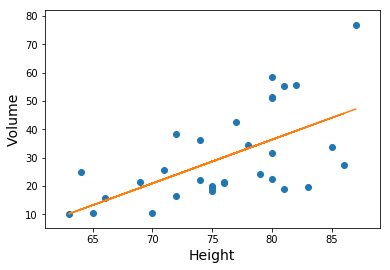

In [106]:
reg_lin('Height', 'Volume')

Aquí no se tiene una correlación lineal clara.

# 8) Probabilidad, distribuciones y funciones distribución.

## Tu turno 8: Primeramente genera un código que muestre la convergencia de la probabilidad que al lanzar un dado el número que obtiene sea par. Por último calcula y grafica la distribución normal y su función de distribución.

Para mostrar la convergencia de la probabilidad de que al lanzar un dado el número obtenido sea par, realizamos un razonamiento parecido al de la moneda:

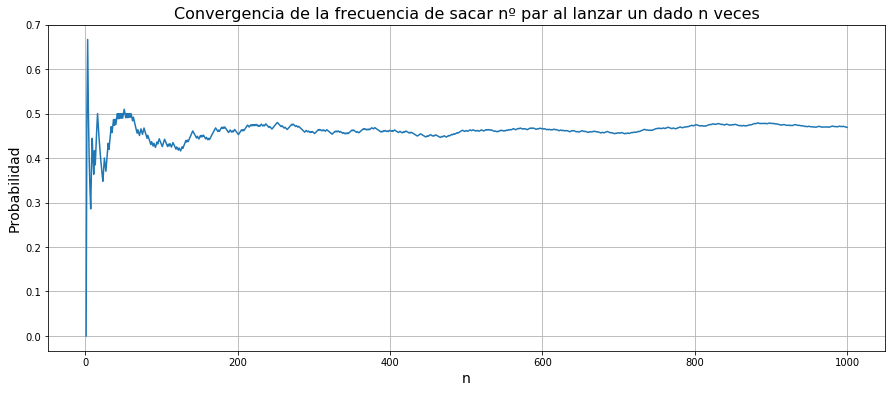

In [107]:
np.random.seed(1111111) # para poder replicar los resultados
n=1000
    
# Generamos la distribución de enteros entre 1 y 6, array de "resultados":
res = np.random.randint(1, 7, n)

# Convertimos nuestra distribución en binomial: a 1 si son pares y a 0 si son impares:
rescopy = res.copy()
rescopy[rescopy % 2 != 0] = 0     # a 1 los impares
rescopy[rescopy != 0] = 1         # a 0 los pares (resto de valores <> 0)

# Arrays de nº lanzamientos y probabilidades:
lanz=np.zeros((1,n+1),float)
probs=np.zeros((1,n+1),float)

for i in range(1, n+1):
    probs[0,i] = rescopy[0:i].sum()
    probs[0,i] = probs[0,i]/i
    lanz[0,i] = i
    
# Graficamos resultados:
plt.figure(figsize=(15, 6))
plt.title('Convergencia de la frecuencia de sacar nº par al lanzar un dado n veces', fontsize=16)
plt.grid(True)
plt.xlabel('n', fontsize=14)
plt.ylabel('Probabilidad', fontsize=14)
_ = plt.plot(lanz[0,1:],probs[0,1:])

Con lo que obtenemos el resultado esperado: en un set de resultados posibles (1,2,3,4,5,6) hay igual nº de resultados pares que de impares, por tanto la probabilidad debe ser de 0.5 para ambos.

Para la normal:

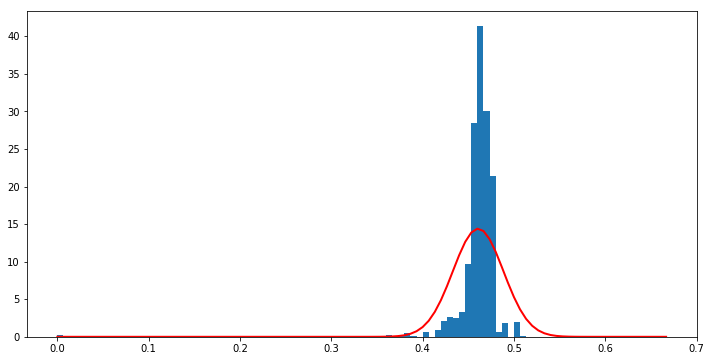

In [108]:
# Histograma + normal teórica
plt.figure(figsize=(12, 6))

aux = probs.T[0:,0]
mu = np.mean(aux)
sigma = np.std(aux)
bins = plt.hist(probs.T[:,0],bins=100,density=True)[1]

# Normal teórica comparada con la de la distribución normal:
_ =plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
            linewidth=2, color='r')

# Tu turno 9: Probar el TCL para una distribución de Poisson

Dadas una media mu = 10, dejamos este valor fijo y vamos variando el tamaño del parámetro 'k' (o 'r' según la bibliografía), y representándolo junto con la distribución normal para misma media y std:

In [109]:
import numpy as np
import scipy.stats as st

def poisson(n,p,xmin,xmax):
#     xmin, xmax = 0, 15
    x = np.linspace(xmin, xmax)
    xb = np.arange(xmin,xmax,1)
#     n, p= 100, 0.1
    mu = n*p
    var= mu
    plt.figure(figsize=(10, 4))
    
    plt.plot(xb, st.poisson.pmf(xb, mu), linewidth=2, color='g')
    _ = plt.plot(x, st.norm.pdf(x, mu, np.sqrt(var)),  linewidth=2)
    plt.legend(['Poisson', 'Normal'] ,fontsize=14)
    
    plt.show()

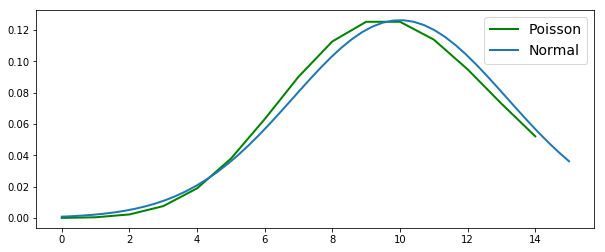

In [110]:
# con r: [0,15]
poisson(n=100,p=0.1,xmin=0,xmax=15)

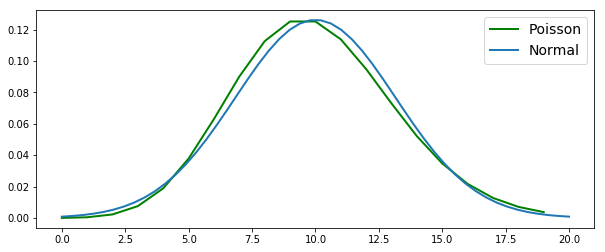

In [247]:
# con r: [0,20]
poisson(n=100,p=0.1,xmin=0,xmax=20)

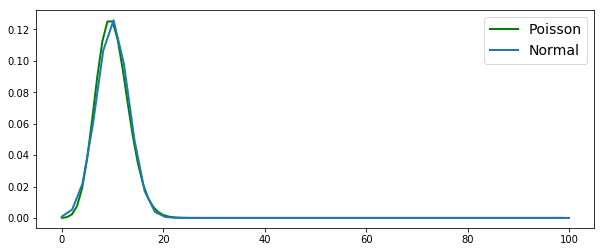

In [248]:
# con r: [0,100]
poisson(n=100,p=0.1,xmin=0,xmax=100)

# 8) Gráficos Cuantil-Cuantil 

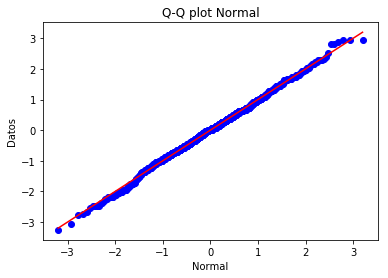

In [249]:
# QQplot
# Primero vamos a ver como hacer un QQplot manual
import numpy as np
import scipy.stats as st
%matplotlib inline 
import matplotlib.pyplot as plt

# Parámetros
N = 1200.0
p = 0.53
muestra = 1000

# Observaciones distribuidas según una binomial
obs = np.random.binomial(N, p, size = muestra)

# variable standarizada según una normal N(0,1)
z = (obs-np.mean(obs))/np.std(obs)

# probplot calcula cuantiles para una gráfica de probabilidad, y opcionalmente muestra el plot.
# Genera una gráfica de probabilidad de los datos de muestra vs de los cuantiles de la 
# distribución teórica especificada (la distribución normal por defecto). 
# probplot calcula opcionalmente una línea de mejor ajuste para los datos y 
# gráficos de los resultados utilizando matplotlib o una función parcela determinada.
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# Hay muchas formas de hacer los qqplots:
# http://statsmodels.sourceforge.net/devel/generated/statsmodels.graphics.gofplots.qqplot.html
st.probplot(z, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal')
plt.ylabel('Datos')

# por si no está %matplotlib inline 
plt.show()

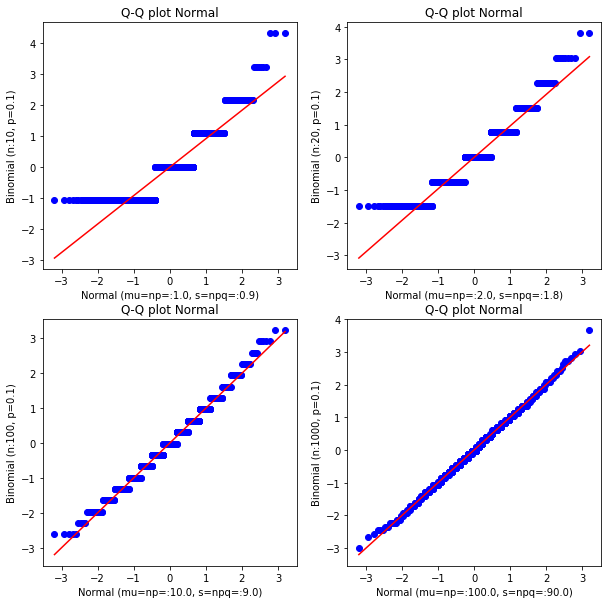

In [250]:
# Ahora hacemos varios QQplots para los caso de antes de la binomial
import numpy as np
import scipy.stats as st

# Parámetros
N1, N2, N3, N4 = 10.0, 20.0, 100.0, 1000.0
p = 0.1
muestra = 1000

# Observaciones distribuidas según una binomial para 4 casos y
# variable standarizada según una normal N(0,1)
obs1 = np.random.binomial(N1, p, size = muestra)
z1 = (obs1-np.mean(obs1))/np.std(obs1)
obs2 = np.random.binomial(N2, p, size = muestra)
z2 = (obs2-np.mean(obs2))/np.std(obs2)
obs3 = np.random.binomial(N3, p, size = muestra)
z3 = (obs3-np.mean(obs3))/np.std(obs3)
obs4 = np.random.binomial(N4, p, size = muestra)
z4 = (obs4-np.mean(obs4))/np.std(obs4)

# QQplots a través de probplot
fSize=10
plt.figure(figsize=(fSize, fSize))

plt.subplot(2, 2, 1);
st.probplot(z1, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu=np=:%0.1f, s=npq=:%0.1f)' %(N1*p, N1*p*(1-p)))
plt.ylabel('Binomial (n:%d, p=%0.1f)' % (N1,p))

plt.subplot(2, 2, 2);
st.probplot(z2, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu=np=:%0.1f, s=npq=:%0.1f)' %(N2*p, N2*p*(1-p)))
plt.ylabel('Binomial (n:%d, p=%0.1f)' % (N2,p))

plt.subplot(2, 2, 3);
st.probplot(z3, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu=np=:%0.1f, s=npq=:%0.1f)' %(N3*p, N3*p*(1-p)))
plt.ylabel('Binomial (n:%d, p=%0.1f)' % (N3,p))

plt.subplot(2, 2, 4);
st.probplot(z4, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu=np=:%0.1f, s=npq=:%0.1f)' %(N4*p, N4*p*(1-p)))
plt.ylabel('Binomial (n:%d, p=%0.1f)' % (N4,p))

# por si no está %matplotlib inline 
plt.show()

(array([-3.19758950e+00, -2.93237785e+00, -2.78437841e+00, -2.67999560e+00,
       -2.59855946e+00, -2.53139899e+00, -2.47402263e+00, -2.42379214e+00,
       -2.37902149e+00, -2.33856546e+00, -2.30160949e+00, -2.26755284e+00,
       -2.23593934e+00, -2.20641415e+00, -2.17869564e+00, -2.15255643e+00,
       -2.12781017e+00, -2.10430217e+00, -2.08190261e+00, -2.06050135e+00,
       -2.04000420e+00, -2.02032992e+00, -2.00140792e+00, -1.98317650e+00,
       -1.96558137e+00, -1.94857451e+00, -1.93211325e+00, -1.91615948e+00,
       -1.90067901e+00, -1.88564107e+00, -1.87101783e+00, -1.85678408e+00,
       -1.84291686e+00, -1.82939524e+00, -1.81620005e+00, -1.80331371e+00,
       -1.79072004e+00, -1.77840415e+00, -1.76635224e+00, -1.75455157e+00,
       -1.74299028e+00, -1.73165738e+00, -1.72054262e+00, -1.70963644e+00,
       -1.69892989e+00, -1.68841463e+00, -1.67808281e+00, -1.66792707e+00,
       -1.65794051e+00, -1.64811661e+00, -1.63844924e+00, -1.62893261e+00,
       -1.61956127e+00, 

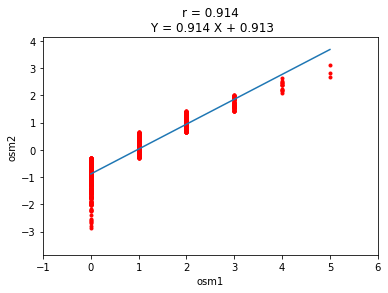

In [57]:
# Estudio de la calidad de un QQplot, mediante una regresión (aquí se utiliza una binomial u una normal).
# QQplot para dos distribuciones seleccionadas
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

muestras = 1000
#np.random.seed(1111111) # para poder replicar los resultados
obs1 = np.random.binomial(100, 0.01, size = muestras)
obs2 = np.random.binomial(100, 0.1, size = muestras)
obs3 = np.random.randn(muestras) 
obs4 = np.random.randn(muestras) 
osm1, osr1=st.probplot(obs1)
osm2, osr2=st.probplot(obs4)
plt.plot(osm1[1],osm2[1],'r.') # cuantiles
plt.xlabel('osm1')
plt.ylabel('osm2')
# calidad mediante un regresión lineal
X=osm1[1]
Y=osm2[1]
b, a = np.polyfit(X, Y, 1)
r = np.corrcoef(X, Y)
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
plt.plot(X, a + b * X)
plt.title('r = {0:2.3f}\n Y = {0:2.3f} X + {1:2.3f}'.format(r[0,1],b,a))
plt.show()

# Tu turno 10: Razonar y explicar porque en la matriz de 2x2 figuras para diferentes parámetros de la binomial, el QQplot que corresponde a la figura inferior derecha (multiplot de 4 figuras), da una línea recta siendo esta una distribución binomial. Reproducir el mismo resultado con una distribución de Poisson. Medir en ambos casos la calidad de QQplot mediante una regresión como se muestra en el último código.

El motivo de que el QQplot de la última distribución binomial ajuste mejor al de una distribución normal es que aquella es la que más datos tiene de las 4, y atendiendo al TCL, cuantos más datos tenga una distribución (tratándose por supuesto de procesos aleatorios que no se influyen mutuamente) más semejanza tendrá con una distribución normal.

Vamos ahora a generar los QQplot para una Poisson de manera similar a lo hecho para la binomial:

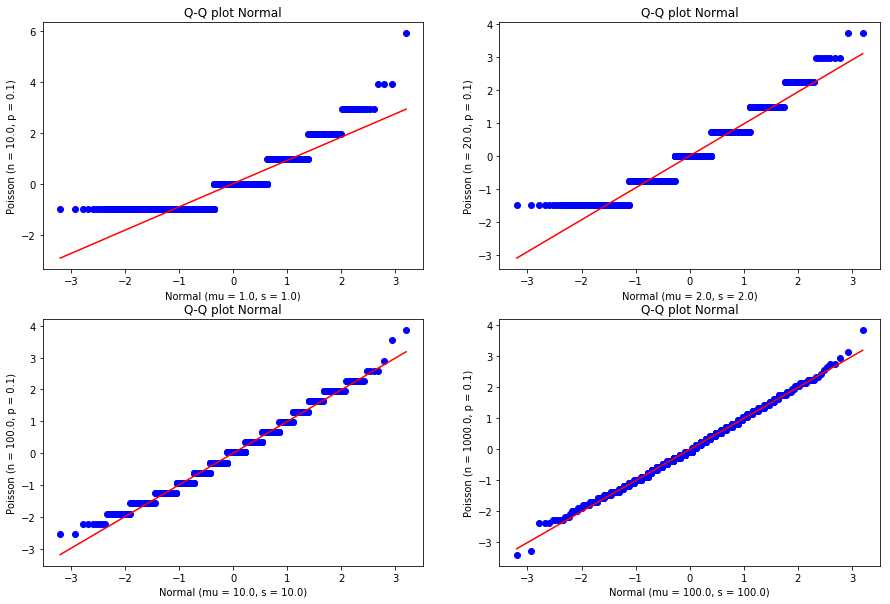

In [59]:
# Parámetros
N1, N2, N3, N4 = 10.0, 20.0, 100.0, 1000.0
p = 0.1
muestra = 1000

# Observaciones distribuidas según una binomial para 4 casos y
# variable standarizada según una normal N(0,1)
obs1 = np.random.poisson(N1*p, size = muestra)
z1 = (obs1-np.mean(obs1))/np.std(obs1)
obs2 = np.random.poisson(N2*p, size = muestra)
z2 = (obs2-np.mean(obs2))/np.std(obs2)
obs3 = np.random.poisson(N3*p, size = muestra)
z3 = (obs3-np.mean(obs3))/np.std(obs3)
obs4 = np.random.poisson(N4*p, size = muestra)
z4 = (obs4-np.mean(obs4))/np.std(obs4)

# QQplots a través de probplot
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1);
st.probplot(z1, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu = {0}, s = {0})'.format(N1*p))
plt.ylabel('Poisson (n = {0}, p = {1})'.format(N1,p))

plt.subplot(2, 2, 2);
st.probplot(z2, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu = {0}, s = {0})'.format(N2*p))
plt.ylabel('Poisson (n = {0}, p = {1})'.format(N2,p))

plt.subplot(2, 2, 3);
st.probplot(z3, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu = {0}, s = {0})'.format(N3*p))
plt.ylabel('Poisson (n = {0}, p = {1})'.format(N3,p))

plt.subplot(2, 2, 4);
st.probplot(z4, dist="norm", plot=plt)
plt.title("Q-Q plot Normal")
plt.xlabel('Normal (mu = {0}, s = {0})'.format(N4*p))
plt.ylabel('Poisson (n = {0}, p = {1})'.format(N4,p))
 
plt.show()

Para la calidad de la regresión lineal de estos QQplots, sobre la anterior matriz de imágenes se evaluará la recta de regresión de la última imagen (2,2):

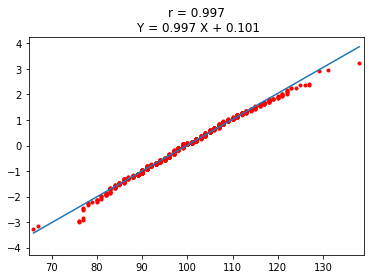

In [63]:
N1, muestras = 1000.0, 1000
np.random.seed(1111111) # para poder replicar los resultados

# Se genera la distribución normal:
dist_norm = np.random.randn(muestras) 

cuant, fit=st.probplot(obs4)
cuant_norm, fit_norm=st.probplot(dist_norm)
plt.plot(cuant[1],cuant_norm[1],'r.')
 
X=cuant[1]
Y=cuant_norm[1]
b, a = np.polyfit(X, Y, 1)
r = np.corrcoef(X, Y)
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
plt.plot(X, a + b * X)
plt.title('r = {0:2.3f}\n Y = {0:2.3f} X + {1:2.3f}'.format(r[0,1],b,a))
plt.show()

Es decir, vemos que hay un coeficiente de correlación de prácticamente 1.0, lo que confirma que hay entre los cuantiles una fuerte relación lineal: esto confirma que cuantos más puntos tenga la distribución de Poisson más se asemeja a la normal (TCL).